In [64]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
# root dfs
cust = pd.read_feather('created_data/customer.feather')
acc = pd.read_feather('created_data/account.feather')
tran = pd.read_feather('created_data/transactions.feather')


#account info
acc_cheq = pd.read_feather('created_data/account_checking.feather')
acc_cred = pd.read_feather('created_data/account_credit.feather')
acc_save = pd.read_feather('created_data/account_saving.feather')

#transaction info
tran_cheq = pd.read_feather('created_data/transaction_checking.feather')
tran_cred = pd.read_feather('created_data/transaction_credit.feather')
tran_save = pd.read_feather('created_data/transaction_saving.feather')


# <u>Customer Cluster</u>

In [66]:
cust

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,35241,Birmingham,AL


In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [68]:
main_clust = cust[['income','age']]

In [69]:
standard = StandardScaler()
robust = RobustScaler()

In [70]:
x_stan = standard.fit_transform(main_clust)
x_rob = robust.fit_transform(main_clust)

In [71]:
def plot_clusters(x,y_res,plt_cluster_centers = False):
    x_centroids = []
    y_centroids = []

    for cluster in set(y_res):
        X = x[y_res == cluster,0]
        Y = x[y_res == cluster,1]

        x_centroids.append(np.mean(X))
        y_centroids.append(np.mean(Y))
        plt.scatter(X,
                    Y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    if plt_cluster_centers:
        plt.scatter(x_centroids,
                    y_centroids,
                    marker='*',
                    c='magenta',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_elbow(X, max_clusters = 10):
    joints = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        joints.append(km.inertia_)
    tmp_df = pd.DataFrame({'Number of Clusters' : range(1,max_clusters+1),'Joints':joints})
    fig=px.line(tmp_df, x= 'Number of Clusters',y='Joints',markers=True)
    fig.show()

plot_elbow(x_stan)

In [72]:
plot_elbow(x_rob)

c:\Users\malco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



Robust at elbow is under 400 while standard at elbow is over

In [73]:
km = KMeans(n_clusters=3,
            n_init=10,
            random_state=0)
y_km_stan = km.fit_predict(x_stan)
y_km_rob = km.fit_predict(x_rob)

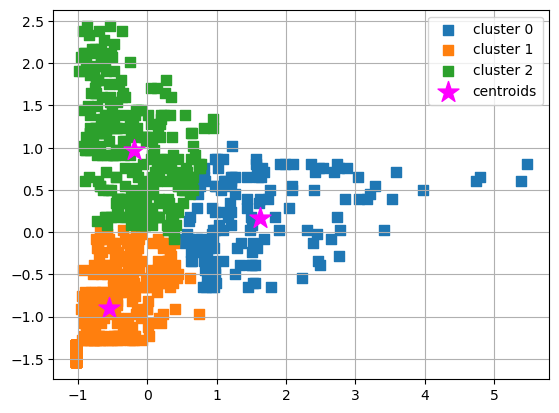

In [74]:
plot_clusters(x_stan,y_km_stan,plt_cluster_centers=True)

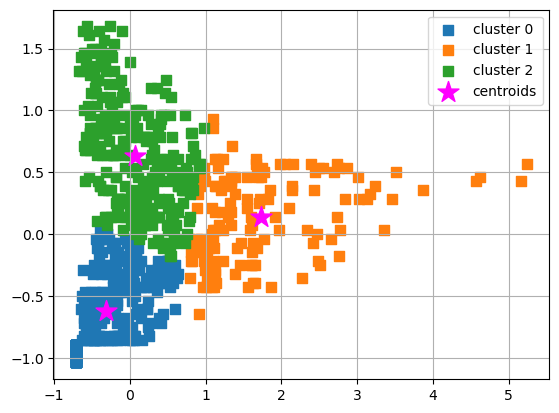

In [75]:
plot_clusters(x_rob,y_km_rob,plt_cluster_centers=True)

# Hierarchal Clustering

In [76]:
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [77]:
def plot_dendrogram(X, method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X,method=method))
    plt.title('Dendrogram')
    plt.ylabel('Euclidean distances')
    plt.xlabel('Points')
    plt.show()

In [78]:
#plot_dendrogram(x_rob)

In [79]:
#plot_dendrogram(x_stan)

In [80]:
ac_r = AgglomerativeClustering(n_clusters=3,
                            affinity='euclidean',
                            linkage='ward')
rob_y = ac_r.fit_predict(x_rob)

ac_s = AgglomerativeClustering(n_clusters=4,
                            affinity='euclidean',
                            linkage='ward')
stan_y = ac_s.fit_predict(x_stan)

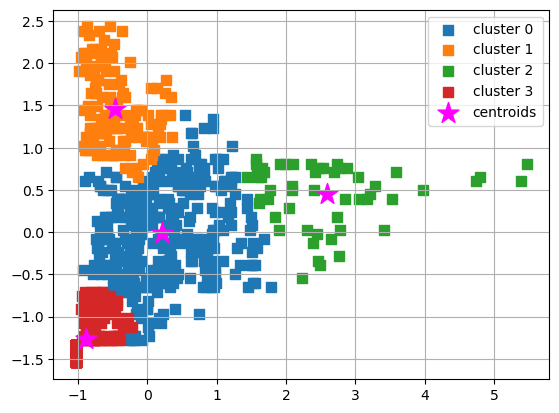

In [81]:
plot_clusters(x_stan, stan_y, plt_cluster_centers=True)

In [82]:
tmp = pd.concat([main_clust,pd.Series(stan_y,name='clust')],axis=1)

In [83]:
#tmp.to_feather(path='created_data/customer_clusters.feather')

In [84]:
tmp[(tmp['clust'] == 1)].describe()

,income,age,clust
count,141.000000,141.000000,141.0
mean,12521.255319,70.347518,1.0
std,7696.412645,8.417656,0.0
min,1039.000000,55.000000,1.0
25%,6355.000000,64.000000,1.0
50%,10919.000000,69.000000,1.0
75%,17584.000000,77.000000,1.0
max,30674.000000,89.000000,1.0


In [85]:
pd.Series(stan_y).value_counts()

0    376
3    177
1    141
2     53
dtype: int64

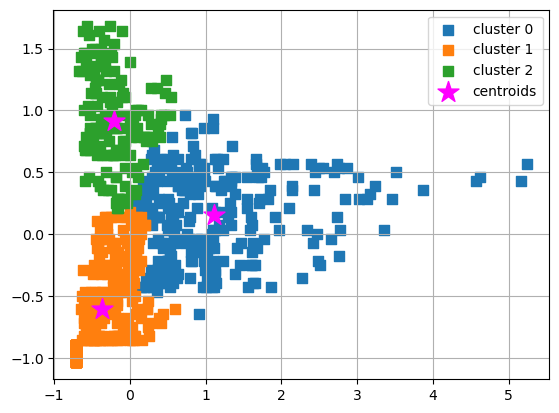

In [86]:
plot_clusters(x_rob,rob_y,plt_cluster_centers=True)

After looking deeper into the data we like the job that the standard scaled 4 cluster hierarchy algo did the most.

# Transaction Behaviour

In [87]:
tran

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,1995-10-21,12.0,IQ
1,97,13628392,0.00,0.00,0.0,254.49,1995-02-05,15.0,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,1995-07-23,NaN,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,1995-01-30,NaN,FK
4,31,13625722,0.00,0.00,0.0,240.55,1995-01-25,20.0,IQ
...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,1995-02-14,16.0,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,1995-03-11,NaN,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,1995-08-26,NaN,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,1995-06-13,11.0,WD


In [88]:
tmp = acc_cheq[(acc_cheq['ending_balance']) > (acc_cheq['starting_balance'])].acct_nbr

In [89]:
tran_cheq['type_transaction'] = 'chequing'
tran_cred['type_transaction'] = 'credit'
tran_save['type_transaction'] = 'savings'
new_tran = pd.concat([tran_cheq,tran_cred,tran_save])
all_cust_trans = cust.merge(new_tran, on='cust_id',how='inner')

In [90]:
new_tran.sort_values(by='cust_id')

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,type_transaction
11774,1362480,5,252.07,231.41,20.66,-2268.59,1995-02-02,NaN,PM,credit
27122,1362480,5,0.00,0.00,0.00,17.10,1995-01-02,19.0,IQ,chequing
33526,1362480,50,-0.15,-0.15,0.00,47.91,1995-01-19,NaN,FK,chequing
46185,1362480,77,-128.90,-128.90,0.00,93.82,1995-02-12,NaN,WD,chequing
1988,1362480,9,-221.24,-221.24,0.00,-2500.00,1995-03-04,7.0,CG,credit
...,...,...,...,...,...,...,...,...,...,...
8926,1363495,10,3.21,0.00,3.21,2571.63,1995-05-31,23.0,IN,chequing
1263,1363495,7,42.79,42.79,0.00,2696.64,1995-04-07,20.0,DP,savings
5104,1363495,35,-60.00,-60.00,0.00,2779.69,1995-12-22,17.0,WD,savings
12286,1363495,13,-10.00,-10.00,0.00,2554.83,1995-07-31,23.0,FP,chequing


In [91]:
cred_trans_per_cust = tran_cred.groupby('cust_id',as_index=False).size()
cred_trans_per_cust.columns = ['cust_id','total_credit_transactions']
all_cust_trans = pd.merge(all_cust_trans,cred_trans_per_cust,how='outer',on='cust_id')
all_cust_trans

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,...,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,type_transaction,total_credit_transactions
0,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,5,0.00,0.00,0.00,2568.01,1995-02-10,14.0,IQ,chequing,32.0
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,10,3.60,0.00,3.60,2453.03,1995-03-31,23.0,IN,chequing,32.0
2,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,15,2.62,0.00,2.62,2097.29,1995-04-30,23.0,IN,chequing,32.0
3,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,20,-154.15,-154.15,0.00,1714.47,1995-06-05,14.0,TR,chequing,32.0
4,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,25,-10.00,-10.00,0.00,2119.95,1995-06-30,23.0,FP,chequing,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,6,43.72,43.72,0.00,-249.05,1995-06-04,NaN,PM,credit,61.0
77556,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,46,-191.29,-191.29,0.00,-191.29,1995-11-09,21.0,CG,credit,61.0
77557,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,53,426.05,426.05,0.00,0.00,1995-12-05,19.0,PM,credit,61.0
77558,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,13,-79.74,-79.74,0.00,-1000.00,1995-06-21,11.0,CG,credit,61.0


In [92]:
cred_trans_per_cust = tran_save.groupby('cust_id',as_index=False).size()
cred_trans_per_cust.columns = ['cust_id','total_savings_transactions']
all_cust_trans = pd.merge(all_cust_trans,cred_trans_per_cust,how='outer',on='cust_id')

cred_trans_per_cust = tran_cheq.groupby('cust_id',as_index=False).size()
cred_trans_per_cust.columns = ['cust_id','total_cheq_transactions']
all_cust_trans = pd.merge(all_cust_trans,cred_trans_per_cust,how='outer',on='cust_id')
all_cust_trans

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,...,principal_amt,interest_amt,new_balance,tran_date,tran_time,tran_code,type_transaction,total_credit_transactions,total_savings_transactions,total_cheq_transactions
0,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,0.00,0.00,2568.01,1995-02-10,14.0,IQ,chequing,32.0,19.0,52.0
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,0.00,3.60,2453.03,1995-03-31,23.0,IN,chequing,32.0,19.0,52.0
2,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,0.00,2.62,2097.29,1995-04-30,23.0,IN,chequing,32.0,19.0,52.0
3,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,-154.15,0.00,1714.47,1995-06-05,14.0,TR,chequing,32.0,19.0,52.0
4,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,-10.00,0.00,2119.95,1995-06-30,23.0,FP,chequing,32.0,19.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,43.72,0.00,-249.05,1995-06-04,NaN,PM,credit,61.0,NaN,99.0
77556,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,-191.29,0.00,-191.29,1995-11-09,21.0,CG,credit,61.0,NaN,99.0
77557,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,426.05,0.00,0.00,1995-12-05,19.0,PM,credit,61.0,NaN,99.0
77558,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,-79.74,0.00,-1000.00,1995-06-21,11.0,CG,credit,61.0,NaN,99.0


In [93]:
all_cust_trans.drop(['tran_date','tran_time'],inplace=True, axis=1)

In [94]:
all_cust_trans.total_savings_transactions.fillna(0,inplace=True)
all_cust_trans.total_cheq_transactions.fillna(0,inplace=True)
all_cust_trans

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,...,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_code,type_transaction,total_credit_transactions,total_savings_transactions,total_cheq_transactions
0,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,5,0.00,0.00,0.00,2568.01,IQ,chequing,32.0,19.0,52.0
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,10,3.60,0.00,3.60,2453.03,IN,chequing,32.0,19.0,52.0
2,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,15,2.62,0.00,2.62,2097.29,IN,chequing,32.0,19.0,52.0
3,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,20,-154.15,-154.15,0.00,1714.47,TR,chequing,32.0,19.0,52.0
4,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,25,-10.00,-10.00,0.00,2119.95,FP,chequing,32.0,19.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,6,43.72,43.72,0.00,-249.05,PM,credit,61.0,0.0,99.0
77556,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,46,-191.29,-191.29,0.00,-191.29,CG,credit,61.0,0.0,99.0
77557,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,53,426.05,426.05,0.00,0.00,PM,credit,61.0,0.0,99.0
77558,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,13,-79.74,-79.74,0.00,-1000.00,CG,credit,61.0,0.0,99.0


In [95]:
acc_save

,cust_id,acct_nbr,minimum_balance,acct_type,starting_balance,ending_balance
0,1363160,13631603,100,BS,113.04,122.54
1,1362487,13624873,500,MM,651.73,12.89
2,1362548,13625483,100,BS,250.24,254.02
3,1362752,13627523,100,BS,600.26,609.33
4,1363017,13630173,100,BS,2011.02,2901.35
...,...,...,...,...,...,...
416,1363141,13631413,100,BS,177.33,528.57
417,1363038,13630383,100,BS,333.53,508.26
418,1362529,13625293,100,BS,662.06,873.14
419,1362895,13628953,100,BS,169.96,96.25


In [96]:
all_cust_trans.groupby(by='cust_id')[['total_credit_transactions','total_savings_transactions','total_cheq_transactions']].mean()

,total_credit_transactions,total_savings_transactions,total_cheq_transactions
cust_id,,,
1362480,32.0,26.0,99.0
1362484,55.0,33.0,99.0
1362485,72.0,0.0,99.0
1362486,NaN,25.0,25.0
1362487,32.0,19.0,52.0
...,...,...,...
1363490,NaN,12.0,0.0
1363491,NaN,18.0,0.0
1363492,29.0,25.0,99.0


In [97]:
px.scatter_3d(all_cust_trans.groupby(by='cust_id')[['total_credit_transactions','total_savings_transactions','total_cheq_transactions','income']].mean(), 'total_cheq_transactions','total_credit_transactions','total_savings_transactions',color='income',opacity=0.6)

In [98]:
all_cust_trans[all_cust_trans['cust_id'] == 1362481]

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,...,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_code,type_transaction,total_credit_transactions,total_savings_transactions,total_cheq_transactions


In [99]:
all_cust_trans.total_credit_transactions = all_cust_trans.total_credit_transactions.fillna(0)
all_cust_trans

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,...,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_code,type_transaction,total_credit_transactions,total_savings_transactions,total_cheq_transactions
0,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,5,0.00,0.00,0.00,2568.01,IQ,chequing,32.0,19.0,52.0
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,10,3.60,0.00,3.60,2453.03,IN,chequing,32.0,19.0,52.0
2,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,15,2.62,0.00,2.62,2097.29,IN,chequing,32.0,19.0,52.0
3,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,20,-154.15,-154.15,0.00,1714.47,TR,chequing,32.0,19.0,52.0
4,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,25,-10.00,-10.00,0.00,2119.95,FP,chequing,32.0,19.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,6,43.72,43.72,0.00,-249.05,PM,credit,61.0,0.0,99.0
77556,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,46,-191.29,-191.29,0.00,-191.29,CG,credit,61.0,0.0,99.0
77557,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,53,426.05,426.05,0.00,0.00,PM,credit,61.0,0.0,99.0
77558,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,13,-79.74,-79.74,0.00,-1000.00,CG,credit,61.0,0.0,99.0


In [100]:
acc_save[acc_save['cust_id'] == 1363251]

,cust_id,acct_nbr,minimum_balance,acct_type,starting_balance,ending_balance
100,1363251,13632513,500,MM,5003.6,5059.46


In [101]:
acc_save[acc_save['cust_id'] == 1363011]

,cust_id,acct_nbr,minimum_balance,acct_type,starting_balance,ending_balance
50,1363011,13630113,100,BS,1470.91,1387.58


In [102]:
acc_save.acct_type.value_counts()

BS    322
MM     99
Name: acct_type, dtype: int64

In [103]:
cred_trans_per_cust = tran_cheq.groupby('cust_id',as_index=False).tran_amt.mean()
cred_trans_per_cust.columns = ['cust_id','avg_cheq_amt']
all_cust_trans = pd.merge(all_cust_trans,cred_trans_per_cust,how='outer',on='cust_id')
all_cust_trans

cred_trans_per_cust = tran_save.groupby('cust_id',as_index=False).tran_amt.mean()
cred_trans_per_cust.columns = ['cust_id','avg_save_amt']
all_cust_trans = pd.merge(all_cust_trans,cred_trans_per_cust,how='outer',on='cust_id')
all_cust_trans

cred_trans_per_cust = tran_cred.groupby('cust_id',as_index=False).tran_amt.mean()
cred_trans_per_cust.columns = ['cust_id','avg_cred_amt']
all_cust_trans = pd.merge(all_cust_trans,cred_trans_per_cust,how='outer',on='cust_id')
all_cust_trans

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,postal_code,city_name,...,interest_amt,new_balance,tran_code,type_transaction,total_credit_transactions,total_savings_transactions,total_cheq_transactions,avg_cheq_amt,avg_save_amt,avg_cred_amt
0,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,0.00,2568.01,IQ,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
1,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,3.60,2453.03,IN,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
2,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,2.62,2097.29,IN,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
3,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,0.00,1714.47,TR,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
4,1362487,6605,71,1,0,M,2,,90159,Los Angeles,...,0.00,2119.95,FP,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,0.00,-249.05,PM,credit,61.0,0.0,99.0,-27.777677,NaN,-16.393443
77556,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,0.00,-191.29,CG,credit,61.0,0.0,99.0,-27.777677,NaN,-16.393443
77557,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,0.00,0.00,PM,credit,61.0,0.0,99.0,-27.777677,NaN,-16.393443
77558,1363303,17875,18,3,0,F,1,,90029,Los Angeles,...,0.00,-1000.00,CG,credit,61.0,0.0,99.0,-27.777677,NaN,-16.393443


In [104]:
all_cust_trans.avg_cheq_amt = all_cust_trans.avg_cheq_amt.fillna(0)
all_cust_trans.avg_cred_amt = all_cust_trans.avg_cred_amt.fillna(0)
all_cust_trans.avg_save_amt = all_cust_trans.avg_save_amt.fillna(0)

In [105]:
all_cust_trans.columns

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status', 'name_prefix', 'postal_code', 'city_name',
       'state_code', 'tran_id', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_code', 'type_transaction',
       'total_credit_transactions', 'total_savings_transactions',
       'total_cheq_transactions', 'avg_cheq_amt', 'avg_save_amt',
       'avg_cred_amt'],
      dtype='object')

In [106]:
all_cust_trans.drop(['city_name','years_with_bank','nbr_children','gender','marital_status','name_prefix','postal_code','city_name','state_code'],axis=1,inplace=True)

In [107]:
all_cust_trans

,cust_id,income,age,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_code,type_transaction,total_credit_transactions,total_savings_transactions,total_cheq_transactions,avg_cheq_amt,avg_save_amt,avg_cred_amt
0,1362487,6605,71,5,0.00,0.00,0.00,2568.01,IQ,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
1,1362487,6605,71,10,3.60,0.00,3.60,2453.03,IN,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
2,1362487,6605,71,15,2.62,0.00,2.62,2097.29,IN,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
3,1362487,6605,71,20,-154.15,-154.15,0.00,1714.47,TR,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
4,1362487,6605,71,25,-10.00,-10.00,0.00,2119.95,FP,chequing,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77555,1363303,17875,18,6,43.72,43.72,0.00,-249.05,PM,credit,61.0,0.0,99.0,-27.777677,0.000000,-16.393443
77556,1363303,17875,18,46,-191.29,-191.29,0.00,-191.29,CG,credit,61.0,0.0,99.0,-27.777677,0.000000,-16.393443
77557,1363303,17875,18,53,426.05,426.05,0.00,0.00,PM,credit,61.0,0.0,99.0,-27.777677,0.000000,-16.393443
77558,1363303,17875,18,13,-79.74,-79.74,0.00,-1000.00,CG,credit,61.0,0.0,99.0,-27.777677,0.000000,-16.393443


In [108]:
tmp = cust[cust['years_with_bank'] == 0].cust_id

In [109]:
tmp = list(tmp)

In [110]:
all_cust_trans[all_cust_trans['cust_id'].isin(tmp)].describe()

,cust_id,income,age,tran_id,tran_amt,principal_amt,interest_amt,new_balance,total_credit_transactions,total_savings_transactions,total_cheq_transactions,avg_cheq_amt,avg_save_amt,avg_cred_amt
count,8.098000e+03,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000
mean,1.363015e+06,25985.416399,45.396394,36.695604,-18.622643,-19.084421,0.462734,582.828605,30.742529,19.670783,81.183873,-15.872605,6.232868,-39.121698
std,2.778773e+02,18244.567949,15.207663,28.046061,262.431057,261.733863,2.385044,1719.860660,27.566427,15.249983,34.531228,21.585765,23.866663,54.004129
min,1.362492e+06,0.000000,15.000000,1.000000,-1992.100000,-1992.100000,0.000000,-9200.000000,0.000000,0.000000,0.000000,-101.501717,-91.625385,-328.571429
25%,1.362743e+06,12973.000000,30.000000,13.000000,-98.732500,-98.732500,0.000000,8.355000,0.000000,0.000000,99.000000,-27.452222,0.000000,-60.745472
50%,1.363036e+06,21198.000000,40.000000,29.000000,-0.750000,-0.750000,0.000000,216.055000,30.000000,23.000000,99.000000,-7.876364,0.322500,-23.211400
75%,1.363272e+06,34855.000000,60.000000,56.000000,0.280000,0.000000,0.000000,1074.630000,49.000000,32.000000,99.000000,-0.416364,11.855200,0.000000
max,1.363471e+06,101177.000000,80.000000,137.000000,3610.670000,3573.800000,61.380000,11100.020000,137.000000,55.000000,99.000000,40.718776,175.163000,0.000000


In [111]:
acc_save[acc_save['cust_id'].isin(tmp)].describe()

,cust_id,acct_nbr,minimum_balance,starting_balance,ending_balance
count,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000
mean,1.363005e+06,1.363005e+07,192.857143,770.290536,1029.833214
std,2.831221e+02,2.831221e+03,170.408219,1024.496910,1377.661833
min,1.362498e+06,1.362498e+07,100.000000,100.240000,2.740000
25%,1.362741e+06,1.362741e+07,100.000000,171.872500,281.947500
50%,1.363024e+06,1.363025e+07,100.000000,332.255000,510.450000
75%,1.363275e+06,1.363275e+07,100.000000,748.475000,1174.327500
max,1.363471e+06,1.363471e+07,500.000000,5929.020000,7471.810000


In [112]:
tmp = pd.DataFrame(acc.cust_id)
tmp['ending balance'] = acc['ending_balance']- acc['starting_balance']

In [113]:
all_cust_trans = all_cust_trans.merge(tmp,how='inner',on='cust_id')

In [114]:
final_tran_df = all_cust_trans.groupby(by='cust_id')[['income','age','total_credit_transactions','total_savings_transactions','total_cheq_transactions','avg_cheq_amt','avg_save_amt','avg_cred_amt','ending balance']].mean()

In [115]:
final_tran_df.columns = ['income','age','num_cred_trans','num_save_trans','num_cheq_trans','avg_cheq_amt','avg_save_amt','avg_cred_amt','money_gained']

In [116]:
final_tran_df

,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained
cust_id,,,,,,,,,
1362480,50890.0,33.0,32.0,26.0,99.0,-2.474646,18.550769,60.895625,-450.503333
1362484,10053.0,42.0,55.0,33.0,99.0,-25.435758,58.474545,16.797636,-499.930000
1362485,22690.0,25.0,72.0,0.0,99.0,-1.659495,0.000000,-10.572639,326.665000
1362486,10701.0,76.0,0.0,25.0,25.0,-37.604800,-6.729600,0.000000,-554.180000
1362487,6605.0,71.0,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187,-156.823333
...,...,...,...,...,...,...,...,...,...
1363490,0.0,15.0,0.0,12.0,0.0,0.000000,2.853333,0.000000,34.240000
1363491,0.0,14.0,0.0,18.0,0.0,0.000000,-10.423889,0.000000,-187.630000
1363492,142274.0,54.0,29.0,25.0,99.0,-12.570404,6.563200,-61.280690,553.223333


In [117]:
robScale = RobustScaler().fit(final_tran_df)
stanScale = StandardScaler().fit(final_tran_df)

x_r = robScale.transform(final_tran_df)
x_s = stanScale.transform(final_tran_df)

In [118]:
plot_elbow(x_s)

c:\Users\malco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [119]:
plot_elbow(x_r)

c:\Users\malco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



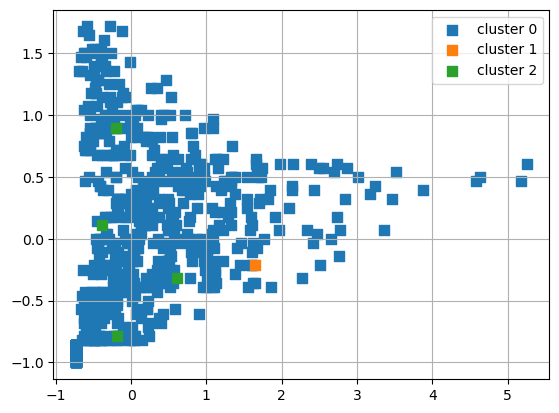

In [120]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)

y_r = km.fit_predict(x_r)

plot_clusters(x_r,y_r)

In [121]:
pd.Series(y_r).value_counts()

0    659
2      4
1      1
dtype: int64

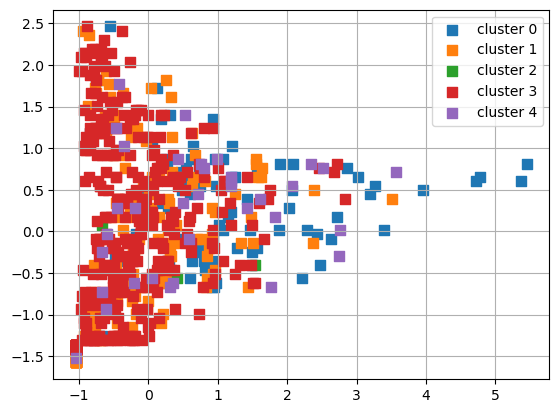

In [122]:
km = KMeans(n_clusters=5,n_init=10,random_state=0)

y_s = km.fit_predict(x_s)

plot_clusters(x_s,y_s)

In [123]:
final_tran_df

,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained
cust_id,,,,,,,,,
1362480,50890.0,33.0,32.0,26.0,99.0,-2.474646,18.550769,60.895625,-450.503333
1362484,10053.0,42.0,55.0,33.0,99.0,-25.435758,58.474545,16.797636,-499.930000
1362485,22690.0,25.0,72.0,0.0,99.0,-1.659495,0.000000,-10.572639,326.665000
1362486,10701.0,76.0,0.0,25.0,25.0,-37.604800,-6.729600,0.000000,-554.180000
1362487,6605.0,71.0,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187,-156.823333
...,...,...,...,...,...,...,...,...,...
1363490,0.0,15.0,0.0,12.0,0.0,0.000000,2.853333,0.000000,34.240000
1363491,0.0,14.0,0.0,18.0,0.0,0.000000,-10.423889,0.000000,-187.630000
1363492,142274.0,54.0,29.0,25.0,99.0,-12.570404,6.563200,-61.280690,553.223333


In [124]:
temp = pd.concat([final_tran_df,pd.Series(y_s,name='clust')],axis=1,ignore_index=True)

In [125]:
#temp[temp['cluster']==2]

In [126]:
pd.Series(y_s).value_counts()

3    352
1    184
0     90
4     35
2      3
dtype: int64

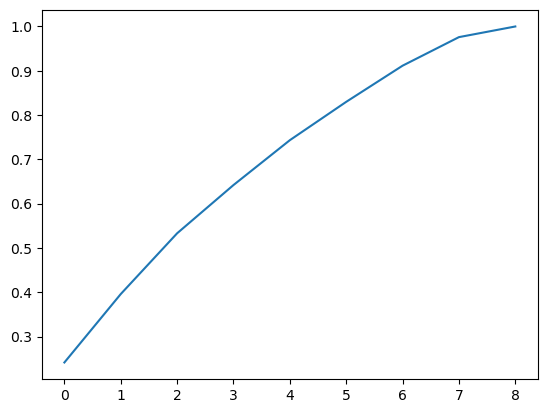

In [127]:
from sklearn.decomposition import PCA
pca_s = PCA()

x = pca_s.fit_transform(x_s)

plt.plot(np.cumsum(pca_s.explained_variance_ratio_))

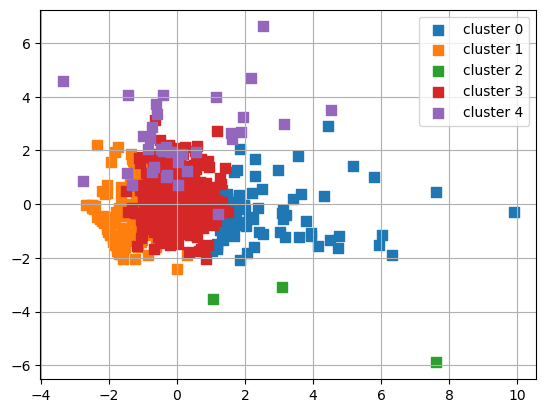

In [128]:
plot_clusters(x,y_s)

In [129]:
pca_s = PCA(n_components=3)

x = pca_s.fit_transform(x_s)

tmp_df = pd.concat([pd.DataFrame(x),pd.DataFrame(y_s)],axis=1)


In [130]:
tmp_df.columns = ['PC1','PC2','PC3','cluster']

px.scatter_3d(tmp_df,'PC1','PC2','PC3',color='cluster',opacity=0.8)

In [131]:
pca_s = PCA(n_components=4)

x = pca_s.fit_transform(x_s)

tmp_df = pd.DataFrame(x)

tmp_df.columns = ['PC1','PC2','PC3','PC4']

px.scatter_3d(tmp_df,'PC1','PC2','PC3',color='PC4',opacity=0.8)


In [132]:
x.shape

(664, 4)

In [133]:
pca_s.components_

array([[ 0.3726177 ,  0.18951161,  0.04748264, -0.18337624,  0.33773668,
        -0.56714363, -0.00506427,  0.16960926, -0.5699553 ],
       [ 0.24171678,  0.33975812,  0.42369127,  0.47373152,  0.20404915,
        -0.04111266,  0.51798641, -0.22609729,  0.24381418],
       [ 0.04966389, -0.32906533, -0.4720838 ,  0.36738674, -0.29238955,
        -0.23492962,  0.52241298,  0.333973  , -0.07922446],
       [ 0.50546439,  0.5516945 , -0.29344729, -0.29901315, -0.44511143,
         0.17396278,  0.05542169,  0.0685599 ,  0.16869942]])

In [134]:
original_x = pca_s.inverse_transform(x)
original_x[0]

array([ 0.27131446,  0.16076416,  0.18137338,  0.44905717,  0.16634015,
       -0.27532312,  0.5650483 , -0.01073192, -0.0084185 ])

In [135]:
x_s[0]

array([ 1.25277645, -0.51353128,  0.05825524,  0.5878222 ,  0.7043928 ,
        0.43650365,  0.40493792,  0.07444609, -0.00859214])

In [136]:
final_tran_df

,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained
cust_id,,,,,,,,,
1362480,50890.0,33.0,32.0,26.0,99.0,-2.474646,18.550769,60.895625,-450.503333
1362484,10053.0,42.0,55.0,33.0,99.0,-25.435758,58.474545,16.797636,-499.930000
1362485,22690.0,25.0,72.0,0.0,99.0,-1.659495,0.000000,-10.572639,326.665000
1362486,10701.0,76.0,0.0,25.0,25.0,-37.604800,-6.729600,0.000000,-554.180000
1362487,6605.0,71.0,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187,-156.823333
...,...,...,...,...,...,...,...,...,...
1363490,0.0,15.0,0.0,12.0,0.0,0.000000,2.853333,0.000000,34.240000
1363491,0.0,14.0,0.0,18.0,0.0,0.000000,-10.423889,0.000000,-187.630000
1363492,142274.0,54.0,29.0,25.0,99.0,-12.570404,6.563200,-61.280690,553.223333


In [137]:
x_s[0]

array([ 1.25277645, -0.51353128,  0.05825524,  0.5878222 ,  0.7043928 ,
        0.43650365,  0.40493792,  0.07444609, -0.00859214])

In [138]:
stanScale.inverse_transform(original_x)[0][0]

29102.811196212333

In [139]:
final_tran_df

,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained
cust_id,,,,,,,,,
1362480,50890.0,33.0,32.0,26.0,99.0,-2.474646,18.550769,60.895625,-450.503333
1362484,10053.0,42.0,55.0,33.0,99.0,-25.435758,58.474545,16.797636,-499.930000
1362485,22690.0,25.0,72.0,0.0,99.0,-1.659495,0.000000,-10.572639,326.665000
1362486,10701.0,76.0,0.0,25.0,25.0,-37.604800,-6.729600,0.000000,-554.180000
1362487,6605.0,71.0,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187,-156.823333
...,...,...,...,...,...,...,...,...,...
1363490,0.0,15.0,0.0,12.0,0.0,0.000000,2.853333,0.000000,34.240000
1363491,0.0,14.0,0.0,18.0,0.0,0.000000,-10.423889,0.000000,-187.630000
1363492,142274.0,54.0,29.0,25.0,99.0,-12.570404,6.563200,-61.280690,553.223333


In [140]:
final_tran_df.describe()

,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,23079.980422,42.661145,30.371988,16.850904,69.584337,-13.141909,8.120326,30.946140,-436.750853
std,22215.443625,18.827340,27.967259,15.576127,41.791793,24.456391,25.777548,402.600914,1601.794447
min,0.000000,13.000000,0.000000,0.000000,0.000000,-174.515758,-91.625385,-351.851852,-11029.145000
25%,7458.000000,28.000000,0.000000,0.000000,24.750000,-24.381566,0.000000,-11.215681,-957.051250
50%,17598.000000,41.000000,30.000000,16.500000,99.000000,-2.073586,0.000000,0.000000,-162.988333
75%,31532.250000,56.000000,49.000000,28.000000,99.000000,0.000000,10.664444,2.784354,314.532500
max,144157.000000,89.000000,155.000000,62.000000,99.000000,65.337778,201.453455,8735.140000,7006.520000


In [141]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(affinity='nearest_neighbors',n_clusters=5,random_state=0)

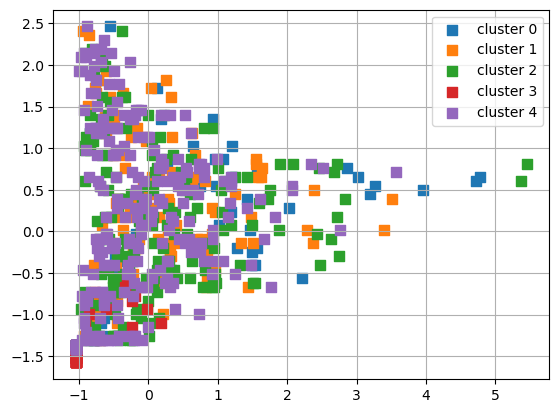

In [142]:
y = sc.fit_predict(x_s)

plot_clusters(x_s,y)

In [143]:
y = sc.fit_predict(x_s)
pca_spec = PCA().fit(x_s)
x_spec = pca_spec.transform(x_s)
pca_spec

PCA()

In [144]:
tmp_df = pd.concat([pd.DataFrame(x_spec),pd.DataFrame(y,columns=['clust'])],axis=1)

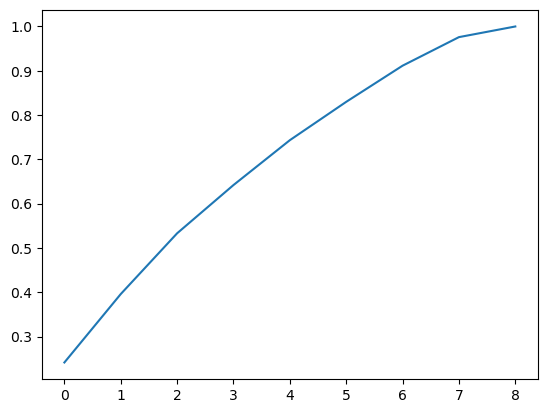

In [145]:
plt.plot(np.cumsum(pca_spec.explained_variance_ratio_))

In [146]:
px.scatter_3d(tmp_df,0,1,2,color='clust')

In [147]:
px.scatter(tmp_df,0,1,color='clust')

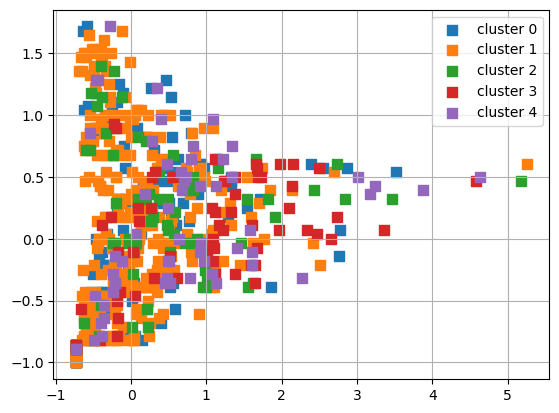

In [148]:
y = sc.fit_predict(x_r)

plot_clusters(x_r,y)

In [149]:
pca_spec = PCA(n_components=3).fit(x_r)
x_spec = pca_spec.transform(x_r)
tmp_df = pd.concat([pd.DataFrame(x_spec),pd.DataFrame(y,columns=['clust'])],axis=1)
px.scatter_3d(tmp_df,0,1,2,color='clust')

In [150]:
original_x = pca_spec.inverse_transform(x_spec)
original_x = robScale.inverse_transform(original_x)
original_x[0][6]

18.975715461853763

In [151]:

final_tran_df_spectral = pd.concat([final_tran_df.reset_index(),pd.Series(y,name='cluster')],axis=1)

In [152]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 3].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,6.400000e+01,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,1.362958e+06,41341.71875,42.140625,25.406250,10.500000,59.031250,-20.889097,7.554051,425.047839,-1903.159583,3.0
std,2.948489e+02,26597.21000,12.791201,19.265661,11.254629,42.113214,37.845713,21.155121,1231.263686,1903.735587,0.0
min,1.362480e+06,0.00000,16.000000,1.000000,0.000000,0.000000,-174.515758,-19.484286,48.405143,-11029.145000,3.0
25%,1.362725e+06,18676.25000,34.500000,12.000000,0.000000,12.000000,-28.614890,0.000000,80.478768,-2122.250000,3.0
50%,1.362934e+06,44189.00000,43.000000,22.500000,12.000000,71.500000,-4.588259,0.000000,128.694130,-1317.745833,3.0
75%,1.363195e+06,57639.75000,54.000000,38.000000,21.000000,99.000000,0.000000,3.467798,181.939059,-812.209167,3.0
max,1.363485e+06,127848.00000,67.000000,109.000000,40.000000,99.000000,37.137475,121.986053,8735.140000,301.195000,3.0


In [153]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 2].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,1.362977e+06,30546.704225,45.225352,29.633803,14.535211,64.042254,-11.845947,1.401990,-87.317010,884.097324,2.0
std,3.016110e+02,25436.963766,15.614277,14.120137,14.564959,45.992060,17.478034,18.735543,68.710808,1454.225534,0.0
min,1.362487e+06,0.000000,16.000000,8.000000,0.000000,0.000000,-101.501717,-91.625385,-351.851852,-2561.906667,2.0
25%,1.362705e+06,12516.000000,35.500000,19.500000,0.000000,0.000000,-22.628182,0.000000,-100.468056,-34.211667,2.0
50%,1.362971e+06,24476.000000,46.000000,27.000000,12.000000,99.000000,-4.062929,0.000000,-61.267872,613.145000,2.0
75%,1.363219e+06,40461.500000,54.500000,33.000000,26.000000,99.000000,0.000000,3.727500,-43.479289,1209.072500,2.0
max,1.363492e+06,142274.000000,80.000000,69.000000,62.000000,99.000000,6.191212,86.820250,-34.569118,5490.450000,2.0


In [154]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 1].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,3.430000e+02,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.0
mean,1.362991e+06,17058.478134,42.166181,33.460641,15.154519,70.413994,-6.719413,-1.681236,-0.738966,-239.690952,1.0
std,2.972439e+02,16525.766454,20.216050,30.859198,15.498803,40.901866,15.261977,9.588299,15.328042,642.877909,0.0
min,1.362485e+06,0.000000,13.000000,0.000000,0.000000,0.000000,-59.650976,-59.035000,-46.331463,-2171.100000,1.0
25%,1.362724e+06,5883.000000,24.500000,0.000000,0.000000,37.000000,-16.314652,-0.377256,-8.832364,-597.260000,1.0
50%,1.362992e+06,13087.000000,40.000000,34.000000,12.000000,99.000000,-1.349495,0.000000,0.000000,-129.745000,1.0
75%,1.363253e+06,23931.000000,57.000000,53.000000,27.000000,99.000000,0.000000,0.280000,0.291069,79.941667,1.0
max,1.363495e+06,144157.000000,88.000000,155.000000,55.000000,99.000000,65.337778,23.032500,63.181290,2462.410000,1.0


In [155]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 0].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,1.270000e+02,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0
mean,1.363019e+06,20531.511811,41.889764,32.259843,30.795276,64.740157,-10.001189,42.479692,-2.312506,349.143924,0.0
std,2.943289e+02,20792.627559,20.070205,26.995947,9.260206,45.863879,21.343841,36.000057,23.625569,1048.067561,0.0
min,1.362484e+06,0.000000,13.000000,0.000000,11.000000,0.000000,-110.269899,7.729318,-100.000000,-3029.886667,0.0
25%,1.362766e+06,5630.000000,24.000000,0.000000,24.000000,0.000000,-18.393990,20.368859,-9.067604,-164.983333,0.0
50%,1.363017e+06,15746.000000,43.000000,39.000000,30.000000,99.000000,-0.203737,31.419000,0.000000,391.910000,0.0
75%,1.363288e+06,30220.500000,57.000000,53.000000,37.000000,99.000000,0.000000,50.141691,0.029298,713.564167,0.0
max,1.363481e+06,102286.000000,89.000000,84.000000,57.000000,99.000000,25.648889,201.453455,119.807660,7006.520000,0.0


In [156]:
final_tran_df_spectral.describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,6.640000e+02,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.00000
mean,1.362990e+06,23079.980422,42.661145,30.371988,16.850904,69.584337,-13.141909,8.120326,30.946140,-436.750853,1.37500
std,2.956475e+02,22215.443625,18.827340,27.967259,15.576127,41.791793,24.456391,25.777548,402.600914,1601.794447,1.15967
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,-174.515758,-91.625385,-351.851852,-11029.145000,0.00000
25%,1.362727e+06,7458.000000,28.000000,0.000000,0.000000,24.750000,-24.381566,0.000000,-11.215681,-957.051250,1.00000
50%,1.362992e+06,17598.000000,41.000000,30.000000,16.500000,99.000000,-2.073586,0.000000,0.000000,-162.988333,1.00000
75%,1.363249e+06,31532.250000,56.000000,49.000000,28.000000,99.000000,0.000000,10.664444,2.784354,314.532500,2.00000
max,1.363495e+06,144157.000000,89.000000,155.000000,62.000000,99.000000,65.337778,201.453455,8735.140000,7006.520000,4.00000


In [157]:
final_tran_df_spectral[final_tran_df_spectral['cust_id']==1362985]

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
328,1362985,11485.0,70.0,59.0,36.0,99.0,-10.113232,32.707778,-16.949153,391.91,0


In [158]:
final_tran_df_spectral.loc[0]

cust_id           1.362480e+06
income            5.089000e+04
age               3.300000e+01
num_cred_trans    3.200000e+01
num_save_trans    2.600000e+01
num_cheq_trans    9.900000e+01
avg_cheq_amt     -2.474646e+00
avg_save_amt      1.855077e+01
avg_cred_amt      6.089563e+01
money_gained     -4.505033e+02
cluster           3.000000e+00
Name: 0, dtype: float64

In [159]:
minmax_df = final_tran_df_spectral.drop('cust_id',axis=1)
minmax_df = minmax.fit_transform(minmax_df)
pd.DataFrame(minmax_df).describe()

NameError: name 'minmax' is not defined

In [ ]:
final_tran_df_spectral = pd.read_feather(path='created_data/final_transaction_cluster.feather')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

test = final_tran_df_spectral.drop('cust_id',axis=1)
test = minmax.fit_transform(test[test['cluster'] == 3])
test = pd.DataFrame(test)

In [ ]:
test.describe().iloc[1].values[:-1]

array([0.10981732, 0.19830827, 0.10289116, 0.50992063, 0.05541872,
       0.32773167, 0.27649415, 0.1511915 , 0.29708636])

In [ ]:
final_tran_df_spectral.columns

Index(['cust_id', 'income', 'age', 'num_cred_trans', 'num_save_trans',
       'num_cheq_trans', 'avg_cheq_amt', 'avg_save_amt', 'avg_cred_amt',
       'money_gained', 'cluster'],
      dtype='object')

In [ ]:
import plotly.graph_objects as go
categories = ['Income','Age','Credit Card Usage','Savings Account Transactions','Chequings Transactions','Chequings Amount (AVG)',
                  'Savings Amount (AVG)','Credit Amount (AVG)','Money Gained (YTD)']

fig = go.Figure()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
minmax = MinMaxScaler()

def plot_radar(df):
    fig = go.Figure()
    num_clust = df['cluster'].max() +1
    theta = df.columns[1:-1] # or manually name columns

    for i in range(num_clust):
        tmp_df = minmax.fit_transform(df.drop('cust_id',axis=1))
        r = pd.DataFrame(tmp_df[df['cluster'] == i]).describe().iloc[1].values[:-1]
        fig.add_trace(go.Scatterpolar(
            r=r,
            theta=theta,
            fill='toself',
            name=f'Cluster: {i}', # or coordinate i to a list of more detailed names for each cluster.
            opacity=0.4
        ))
    fig.update_layout(
    polar=dict(radialaxis=dict(visible=False)),
    
    )

    fig.show()

In [ ]:
plot_radar(final_tran_df_spectral)

NameError: name 'plot_radar' is not defined

In [ ]:
final_tran_df_spectral.describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,6.640000e+02,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,1.362990e+06,23079.980422,42.661145,30.371988,16.850904,69.584337,-13.141909,8.120326,30.946140,-436.750853,2.489458
std,2.956475e+02,22215.443625,18.827340,27.967259,15.576127,41.791793,24.456391,25.777548,402.600914,1601.794447,1.338560
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,-174.515758,-91.625385,-351.851852,-11029.145000,0.000000
25%,1.362727e+06,7458.000000,28.000000,0.000000,0.000000,24.750000,-24.381566,0.000000,-11.215681,-957.051250,1.750000
50%,1.362992e+06,17598.000000,41.000000,30.000000,16.500000,99.000000,-2.073586,0.000000,0.000000,-162.988333,2.000000
75%,1.363249e+06,31532.250000,56.000000,49.000000,28.000000,99.000000,0.000000,10.664444,2.784354,314.532500,4.000000
max,1.363495e+06,144157.000000,89.000000,155.000000,62.000000,99.000000,65.337778,201.453455,8735.140000,7006.520000,4.000000


In [ ]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 4].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,2.430000e+02,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.0
mean,1.362996e+06,20117.399177,45.489712,37.382716,29.658436,93.111111,-15.646357,16.975760,3.156523,-244.354527,4.0
std,2.995960e+02,17475.254057,19.210956,27.373406,9.343900,17.791492,21.211888,37.118742,116.949479,1045.650228,0.0
min,1.362480e+06,0.000000,16.000000,0.000000,11.000000,0.000000,-98.931919,-54.905455,-351.851852,-4905.533333,4.0
25%,1.362744e+06,7235.500000,30.000000,14.500000,23.000000,99.000000,-26.696667,-3.013903,-15.103978,-748.776667,4.0
50%,1.362985e+06,16865.000000,45.000000,40.000000,28.000000,99.000000,-8.660808,7.544737,-0.243333,-167.070000,4.0
75%,1.363270e+06,29080.000000,59.000000,54.000000,36.000000,99.000000,-0.197071,28.827340,1.119123,274.881667,4.0
max,1.363495e+06,102286.000000,89.000000,137.000000,55.000000,99.000000,25.648889,201.453455,1675.890000,7006.520000,4.0


In [ ]:
fig.add_trace(go.Scatterpolar(
      r=[0.17569743, 0.36606644, 0.2159183 , 0.07160804, 0.89552239,
       0.49822078, 0.05568578, 0.08493974, 0.51908478],
      theta=categories,
      fill='toself',
      name='Under Utilizing Credit, Bad Savers (cluster 2)',
      opacity=0.4
))

fig.add_trace(go.Scatterpolar(
      r=[0.3166833 , 0.41337631, 0.17058824, 0.10658622, 0.88921569,
       0.71844167, 0.21584305, 0.04770601, 0.6779617],
      theta=categories,
      fill='toself',
      name='Wealthy, Big Spenders (cluster 0)',
      opacity=0.4
))

fig.add_trace(go.Scatterpolar(
      r=[0.10981732, 0.19830827, 0.10289116, 0.50992063, 0.05541872,
       0.32773167, 0.27649415, 0.1511915 , 0.29708636],
      theta=categories,
      fill='toself',
      name='Young Savers (cluster 3)',
      opacity=0.4
))

fig.add_trace(go.Scatterpolar(
      r=[0.27009765, 0.44029394, 0.22565526, 0.23253857, 0.10346051,
       0.34096362, 0.70194699, 0.07664649, 0.42963382],
      theta=categories,
      fill='toself',
      name='Credit Builders, Money Savers (cluster 1)',
      opacity=0.4
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=False)),
    
)

fig.show()

In [ ]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 1].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,1.150000e+02,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,1.362984e+06,27327.669565,48.260870,31.817391,14.417391,5.069565,0.677522,2.338345,23.931724,264.937565,1.0
std,2.938640e+02,19471.100647,15.699529,24.891901,15.246502,11.520936,10.785443,15.456392,271.170264,1263.018310,0.0
min,1.362499e+06,0.000000,17.000000,0.000000,0.000000,0.000000,-32.775556,-91.625385,-207.719200,-3671.230000,1.0
25%,1.362716e+06,12725.000000,38.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-16.526805,-182.710833,1.0
50%,1.363016e+06,23294.000000,47.000000,31.000000,12.000000,0.000000,0.000000,0.000000,0.000000,190.635000,1.0
75%,1.363209e+06,37325.500000,57.500000,46.500000,26.000000,0.000000,0.000000,3.564821,9.073260,724.882500,1.0
max,1.363486e+06,101177.000000,88.000000,141.000000,62.000000,49.000000,65.337778,42.236190,2814.610000,5490.450000,1.0


In [ ]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 2].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,1.362977e+06,30546.704225,45.225352,29.633803,14.535211,64.042254,-11.845947,1.401990,-87.317010,884.097324,2.0
std,3.016110e+02,25436.963766,15.614277,14.120137,14.564959,45.992060,17.478034,18.735543,68.710808,1454.225534,0.0
min,1.362487e+06,0.000000,16.000000,8.000000,0.000000,0.000000,-101.501717,-91.625385,-351.851852,-2561.906667,2.0
25%,1.362705e+06,12516.000000,35.500000,19.500000,0.000000,0.000000,-22.628182,0.000000,-100.468056,-34.211667,2.0
50%,1.362971e+06,24476.000000,46.000000,27.000000,12.000000,99.000000,-4.062929,0.000000,-61.267872,613.145000,2.0
75%,1.363219e+06,40461.500000,54.500000,33.000000,26.000000,99.000000,0.000000,3.727500,-43.479289,1209.072500,2.0
max,1.363492e+06,142274.000000,80.000000,69.000000,62.000000,99.000000,6.191212,86.820250,-34.569118,5490.450000,2.0


In [ ]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 1].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,1.150000e+02,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,1.362984e+06,27327.669565,48.260870,31.817391,14.417391,5.069565,0.677522,2.338345,23.931724,264.937565,1.0
std,2.938640e+02,19471.100647,15.699529,24.891901,15.246502,11.520936,10.785443,15.456392,271.170264,1263.018310,0.0
min,1.362499e+06,0.000000,17.000000,0.000000,0.000000,0.000000,-32.775556,-91.625385,-207.719200,-3671.230000,1.0
25%,1.362716e+06,12725.000000,38.000000,14.000000,0.000000,0.000000,0.000000,0.000000,-16.526805,-182.710833,1.0
50%,1.363016e+06,23294.000000,47.000000,31.000000,12.000000,0.000000,0.000000,0.000000,0.000000,190.635000,1.0
75%,1.363209e+06,37325.500000,57.500000,46.500000,26.000000,0.000000,0.000000,3.564821,9.073260,724.882500,1.0
max,1.363486e+06,101177.000000,88.000000,141.000000,62.000000,49.000000,65.337778,42.236190,2814.610000,5490.450000,1.0


In [ ]:
final_tran_df_spectral[final_tran_df_spectral['cluster'] == 0].describe()

,cust_id,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained,cluster
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,1.362957e+06,40914.215686,46.176471,10.235294,4.156863,90.137255,-61.037315,3.131440,202.452562,-4001.760163,0.0
std,2.882588e+02,33093.680481,17.149584,18.709985,9.244182,21.685958,38.010113,15.803420,1223.301736,2258.268065,0.0
min,1.362488e+06,0.000000,16.000000,0.000000,0.000000,19.000000,-174.515758,-17.152353,-225.000000,-11029.145000,0.0
25%,1.362714e+06,11901.500000,32.500000,0.000000,0.000000,99.000000,-91.965769,0.000000,0.000000,-5328.205000,0.0
50%,1.363009e+06,39704.000000,48.000000,0.000000,0.000000,99.000000,-49.661717,0.000000,0.000000,-2940.075000,0.0
75%,1.363198e+06,56340.000000,57.000000,10.000000,0.000000,99.000000,-27.145303,0.000000,1.152391,-2565.236667,0.0
max,1.363480e+06,129196.000000,89.000000,60.000000,39.000000,99.000000,-16.564949,76.822381,8735.140000,-663.685000,0.0


In [ ]:
#final_tran_df_spectral.to_feather(path='created_data/final_transaction_cluster.feather')

In [ ]:
scary_list_very_large_dont_print = final_tran_df_spectral[final_tran_df_spectral['cluster'] == 3].cust_id.values

In [ ]:
acc_cred[acc_cred['cust_id'].isin(scary_list_very_large_dont_print)].describe()

,cust_id,credit_limit,credit_rating,starting_balance,ending_balance
count,1.000000e+01,10.000000,10.0,10.000000,10.00000
mean,1.362964e+06,1920.000000,0.0,1247.172000,709.17100
std,2.793449e+02,1209.040023,0.0,1254.272924,915.38807
min,1.362650e+06,1000.000000,0.0,0.000000,0.00000
25%,1.362726e+06,1000.000000,0.0,18.292500,63.64000
50%,1.362935e+06,1050.000000,0.0,919.570000,401.92500
75%,1.363117e+06,3000.000000,0.0,2505.907500,1000.00000
max,1.363462e+06,4100.000000,0.0,2822.430000,3000.00000


In [ ]:
final_tran_df

,income,age,num_cred_trans,num_save_trans,num_cheq_trans,avg_cheq_amt,avg_save_amt,avg_cred_amt,money_gained
cust_id,,,,,,,,,
1362480,50890.0,33.0,32.0,26.0,99.0,-2.474646,18.550769,60.895625,-450.503333
1362484,10053.0,42.0,55.0,33.0,99.0,-25.435758,58.474545,16.797636,-499.930000
1362485,22690.0,25.0,72.0,0.0,99.0,-1.659495,0.000000,-10.572639,326.665000
1362486,10701.0,76.0,0.0,25.0,25.0,-37.604800,-6.729600,0.000000,-554.180000
1362487,6605.0,71.0,32.0,19.0,52.0,-26.513269,-33.623158,-47.987187,-156.823333
...,...,...,...,...,...,...,...,...,...
1363490,0.0,15.0,0.0,12.0,0.0,0.000000,2.853333,0.000000,34.240000
1363491,0.0,14.0,0.0,18.0,0.0,0.000000,-10.423889,0.000000,-187.630000
1363492,142274.0,54.0,29.0,25.0,99.0,-12.570404,6.563200,-61.280690,553.223333


In [ ]:
temp = pd.concat([final_tran_df,pd.DataFrame([[50000,21,50,0,2,-30,-30,0,2000]],columns=['income', 'age', 'num_cred_trans', 'num_save_trans', 'num_cheq_trans',
       'avg_cheq_amt', 'avg_save_amt', 'avg_cred_amt', 'money_gained'])],axis=0)

In [ ]:
ignore = robScale.fit_transform(temp)
y = sc.fit_predict(ignore)
y[-1]

1

# EXPERIMENTING

first cluster, 4d before dummies

In [ ]:
clust_1 = cust[['income','age','gender','state_code']]

convert to dummies and clean a bit

In [ ]:
# simple boolean dummy for gender
clust_1['gender_dummy'] = clust_1['gender'].replace({'M':1,'F':0})

# expand state dummy into boolean dummy
df_dummy = pd.get_dummies(clust_1['state_code'])

# concat and drop old dummies
clust_1 = pd.concat([clust_1,df_dummy], axis=1)
clust_1 = clust_1.drop(['gender','state_code'],axis=1)


# People under 18 have no income, can't get credit cards and are not valuable to our data.
clust_1 = clust_1[clust_1['age'] > 18]

C:\Users\malco\AppData\Local\Temp\ipykernel_18924\4042773886.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
px.scatter(clust_1,clust_1.groupby('age').income.mean().values,np.sort(clust_1.age.unique()))

In [ ]:
px.scatter_3d(clust_1, x='age',y='income', z='gender_dummy')

^ This pattern will come up later

# Scaling

In [ ]:
clust_1

,income,age,gender_dummy,AL,AZ,CA,CO,DC,FL,GA,...,NY,OH,OK,OR,PA,TN,TX,VA,WA,WI
0,26150,46,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6605,71,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18548,38,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47668,54,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44554,59,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,2289,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
742,14795,36,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,26387,56,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
744,61300,50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We found out a robust scaler is much better than standard

In [ ]:
robScale = RobustScaler()

In [ ]:
robScale.fit(clust_1)

RobustScaler()

In [ ]:
x = robScale.transform(clust_1)

In [ ]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            random_state=0)

In [ ]:
y_km = km.fit_predict(x)

In [ ]:
def plot_clusters(x,y_res,plt_cluster_centers = False):
    x_centroids = []
    y_centroids = []

    for cluster in set(y_res):
        X = x[y_res == cluster,0]
        Y = x[y_res == cluster,1]

        x_centroids.append(np.mean(X))
        y_centroids.append(np.mean(Y))
        plt.scatter(X,
                    Y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    if plt_cluster_centers:
        plt.scatter(x_centroids,
                    y_centroids,
                    marker='*',
                    c='magenta',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

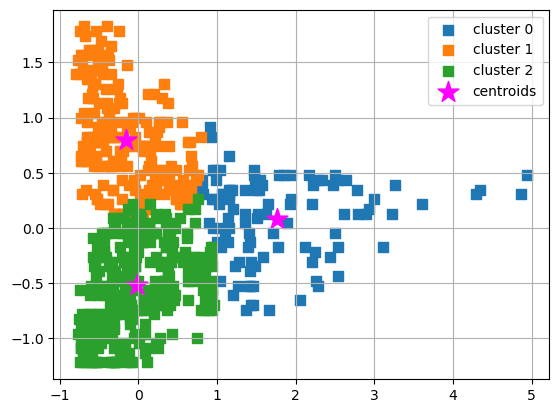

In [ ]:
plot_clusters(x,y_km,plt_cluster_centers=True)

In [ ]:
def plot_elbow(X, max_clusters = 10):
    joints = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        joints.append(km.inertia_)
    tmp_df = pd.DataFrame({'Number of Clusters' : range(1,max_clusters+1),'Joints':joints})
    fig=px.line(tmp_df, x= 'Number of Clusters',y='Joints',markers=True)
    fig.show()
    

In [ ]:
plot_elbow(x)

c:\Users\malco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
def plot_elbow_sil(X, max_clusters = 10):
    joints = []
    for i in range(2,max_clusters+2):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        y_db = km.fit_predict(X)
        joints.append(silhouette_score(X,y_db))
    tmp_df = pd.DataFrame({'Number of Clusters' : range(1,max_clusters+1),'Joints':joints})
    fig=px.line(joints)
    fig.show()

In [ ]:
clust_1['cluster'] = y_km

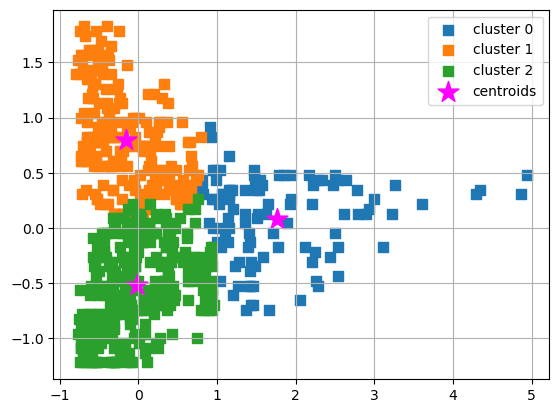

In [ ]:
plot_clusters(x,y_km,plt_cluster_centers=True)

# Experiment with PCA with clust_1

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
robScale.fit(clust_1)
x = robScale.transform(clust_1)

In [ ]:
pca = PCA()
pca.fit(x)

x_pca = pca.transform(x)

In [ ]:
x_pca.shape

(625, 37)

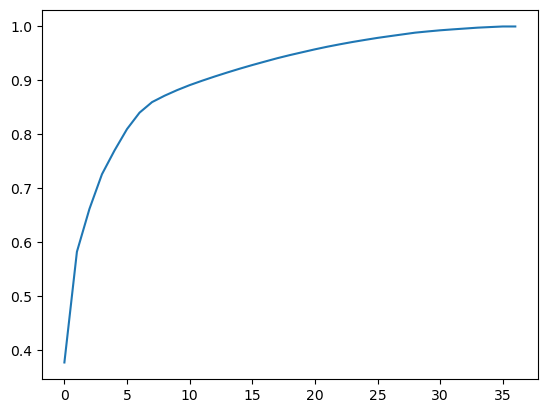

In [ ]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pca = PCA(n_components=4)
pca.fit(x)

x_pca = pca.transform(x)

In [ ]:
df = pd.DataFrame(x_pca)
df.columns = ['PC1','PC2','PC3','PC4']

In [ ]:
df = pd.concat([df,pd.Series(y_km,name='clust')],axis=1)

In [ ]:
px.scatter(df, x='PC1',y='PC2',color='clust')

PC3 is mainly representing gender,
PC2 is mainly representing age,
PC1 is mainly representing income,
PC4 is mainly representing people residing in California
(California has the highest occurence of states at ~140)

# Now we will try a more simple cluster

In [ ]:
clust_2_simple = clust_1[['income','age','gender_dummy']]

In [ ]:
robScale.fit(clust_2_simple)

RobustScaler()

In [ ]:
x = robScale.transform(clust_2_simple)

In [ ]:
km = KMeans(n_clusters=3,
            n_init=10,
            random_state=0)

In [ ]:
y_xr = km.fit_predict(x)
clust_2_simple = pd.concat([clust_2_simple,pd.Series(y_xr, name='cluster')],axis=1)

In [ ]:
set(y_xr)

{0, 1, 2}

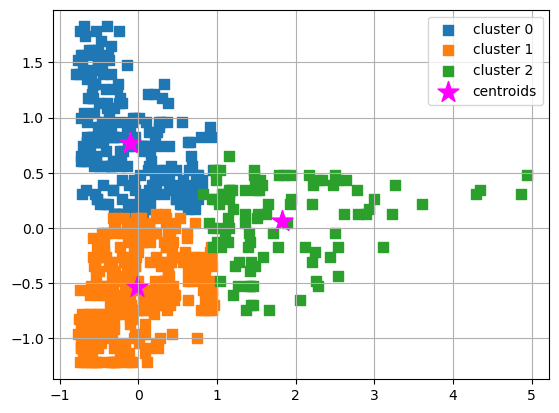

In [ ]:
plot_clusters(x,y_xr,plt_cluster_centers=True)

In [ ]:
plot_elbow(x)

c:\Users\malco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



# PCA for simple cluster

In [ ]:
pca = PCA(n_components=3)
pca.fit(x)

PCA(n_components=3)

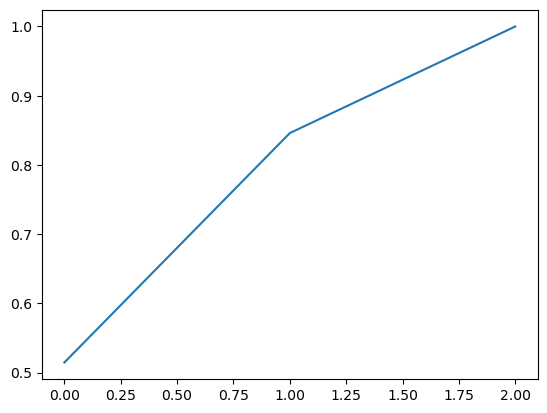

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

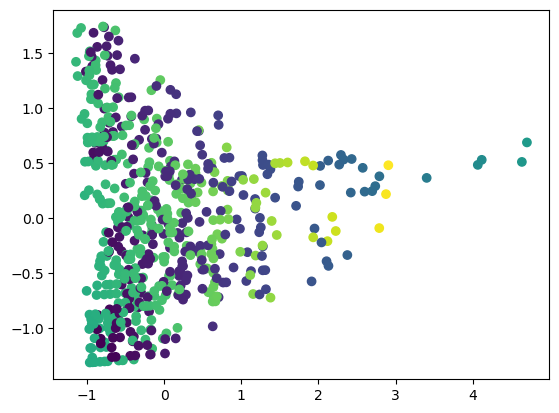

In [ ]:
pca = PCA(n_components=3)
pca.fit(x)
x_pca = pca.transform(x)
plt.scatter(x_pca[:,0],x_pca[:,1],c=x_pca[:,2])

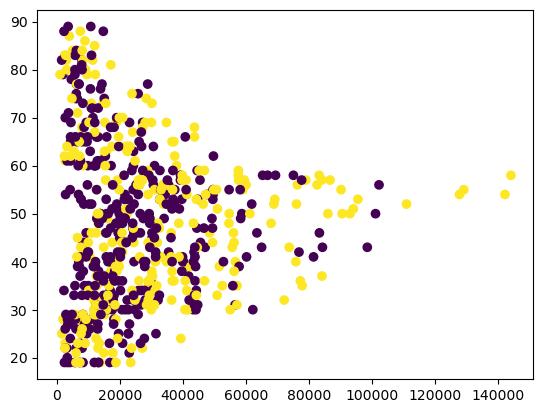

In [ ]:
plt.scatter(clust_2_simple.income,clust_2_simple.age,c=clust_2_simple.gender_dummy)

In [ ]:
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

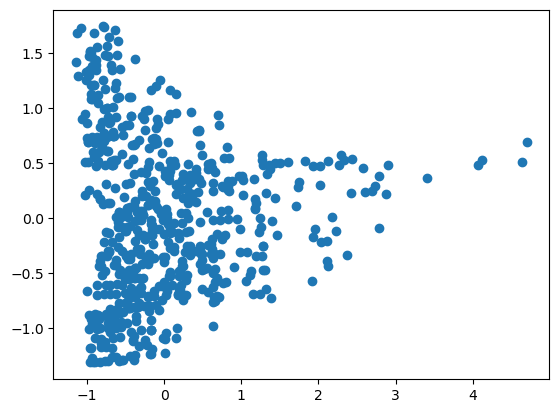

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1])